In [1]:
import cv2
import mediapipe as mp

In [3]:

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Process the video file.
def process_video(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Render the landmarks on the frame.
            frame.flags.writeable = True
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            out.write(frame)

    cap.release()
    out.release()


In [4]:

input_video = "../data/raw/IMG_3301.mov" # Your input video file
output_video = 'output_video.mp4' # Your output video file with landmarks

process_video(input_video, output_video)


In [39]:
import numpy as np

def process_video_only_lines(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
        # Custom drawing options for keypoints and connections.
    drawing_spec_landmarks = mp_drawing.DrawingSpec( thickness=2, circle_radius=9)
    drawing_spec_connections = mp_drawing.DrawingSpec( thickness=2, circle_radius=4)

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with the same dimensions as the input frame.
            blank_frame = np.zeros((height, width, 3), dtype=np.uint8)

            if results.pose_landmarks:
                # Draw keypoints and connections on the blank frame.
                mp_drawing.draw_landmarks(blank_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                          landmark_drawing_spec=drawing_spec_landmarks,
                                          connection_drawing_spec=drawing_spec_connections)
            out.write(blank_frame)

    cap.release()
    out.release()


In [40]:
filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/params_{filename}"

process_video_only_lines(input_video, output_video)


In [ ]:
filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/{filename}"

process_video(input_video, output_video)


: 

In [10]:
def process_video_colors(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    # Custom drawing options for keypoints and connections.
    drawing_spec_landmarks = mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=4, circle_radius=6)
    drawing_spec_connections = mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=4, circle_radius=4)


    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with a colored background.
            background_color = (50, 50, 50)
            colored_frame = np.full((height, width, 3), background_color, dtype=np.uint8)

            if results.pose_landmarks:
                # Draw keypoints and connections with custom drawing options.
                mp_drawing.draw_landmarks(colored_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                          landmark_drawing_spec=drawing_spec_landmarks,
                                          connection_drawing_spec=drawing_spec_connections)

            out.write(colored_frame)

    cap.release()
    out.release()


In [12]:

filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/colors_lines_{filename}"

process_video_colors(input_video, output_video)


In [30]:
import numpy as np

def euclidean_distance(point1, point2):
    return ((point1.x - point2.x)**2 + (point1.y - point2.y)**2 + (point1.z - point2.z)**2)**0.5


In [33]:
import numpy as np

def process_video_col_coded(input_video, output_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    prev_landmarks = None
    prev_velocities = None
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Create a blank frame with a colored background.
            background_color = (50, 50, 50)
            colored_frame = np.full((height, width, 3), background_color, dtype=np.uint8)

            if results.pose_landmarks:
                if prev_landmarks:
                    velocities = [euclidean_distance(curr, prev) for curr, prev in zip(results.pose_landmarks.landmark, prev_landmarks.landmark)]
                    if prev_velocities:
                        accelerations = [curr - prev for curr, prev in zip(velocities, prev_velocities)]
                        
                        # Normalize accelerations to the range [0, 1].
                        norm_accelerations = (np.array(accelerations) - np.min(accelerations)) / (np.max(accelerations) - np.min(accelerations))
                        colors = [(int(a * 255), 0, int((1 - a) * 255)) for a in norm_accelerations]
                    else:
                        accelerations = None
                        colors = None
                else:
                    velocities = None
                    accelerations = None
                    colors = None
                
                prev_landmarks = results.pose_landmarks
                prev_velocities = velocities

                # Draw landmarks and connections with custom colors.
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    single_landmark_list = [landmark]
                    
                    if colors:
                        drawing_spec_landmarks = mp_drawing.DrawingSpec(color=colors[idx], thickness=4, circle_radius=6)
                    else:
                        drawing_spec_landmarks = mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=4, circle_radius=6)
                    
                    mp_drawing.draw_landmarks(colored_frame, single_landmark_list, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=drawing_spec_landmarks)
                    
            out.write(colored_frame)

    cap.release()
    out.release()


In [34]:

filename = "IMG_3301.mov"
input_video = f"../data/raw/{filename}" # Your input video file
output_video = f"../data/processed/colors_coded_{filename}"

process_video_col_coded(input_video, output_video)


AttributeError: 'list' object has no attribute 'landmark'

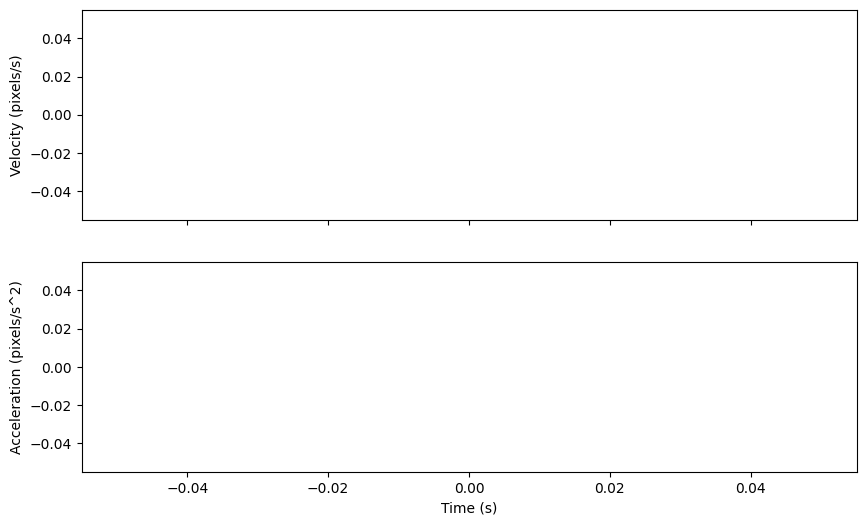

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Process the video and extract keypoints.
def extract_keypoints(input_video):
    cap = cv2.VideoCapture(input_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    keypoints = []

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the frame to RGB format.
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb.flags.writeable = False

            # Detect the pose landmarks.
            results = pose.process(frame_rgb)

            # Store the keypoints for later analysis.
            if results.pose_landmarks:
                keypoints.append(results.pose_landmarks)

    cap.release()

    return keypoints, fps

def calculate_velocity_acceleration(keypoints, fps, landmark):
    coordinates = np.array([(lm.x, lm.y) for frame in keypoints for lm in frame.landmark[landmark:landmark+1]])

    # Calculate the velocity.
    velocity = np.diff(coordinates, axis=0) * fps

    # Calculate the acceleration.
    acceleration = np.diff(velocity, axis=0) * fps

    return velocity, acceleration

def plot_velocity_acceleration(velocity, acceleration, fps):
    time = np.arange(0, len(velocity)) / fps

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    ax1.plot(time, velocity)
    ax1.set_ylabel("Velocity (pixels/s)")

    ax2.plot(time[:-1], acceleration)
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Acceleration (pixels/s^2)")

    plt.show()

input_video = 'input_video.mp4' # Your input video file
landmark = 15 # Index of the right wrist landmark in MediaPipe Pose

keypoints, fps = extract_keypoints(input_video)
velocity, acceleration = calculate_velocity_acceleration(keypoints, fps, landmark)
plot_velocity_acceleration(velocity, acceleration, fps)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_heatmap(keypoints, landmark, frame_shape, bins=50):
    # Extract the (x, y) coordinates of the specified landmark from the keypoints.
    coordinates = np.array([(lm.x * frame_shape[1], (1 - lm.y) * frame_shape[0]) for frame in keypoints for lm in frame.landmark[landmark:landmark+1]])

    # Create a 2D histogram of the coordinates.
    heatmap, xedges, yedges = np.histogram2d(coordinates[:, 1], coordinates[:, 0], bins=bins)

    # Normalize the heatmap.
    heatmap /= np.max(heatmap)

    return heatmap

def plot_heatmap(heatmap):
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap='viridis', cbar_kws={'label': 'Frequency'})
    plt.gca().invert_yaxis()
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("Right Wrist Heatmap")
    plt.show()

input_video = 'input_video.mp4' # Your input video file
landmark = 15 # Index of the right wrist landmark in MediaPipe Pose

cap = cv2.VideoCapture(input_video)
frame_shape = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
cap.release()

keypoints, _ = extract_keypoints(input_video)
heatmap = create_heatmap(keypoints, landmark, frame_shape)
plot_heatmap(heatmap)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed